[Polarsteps](https://www.polarsteps.com) is an excellent travel / journalling program. It includes a solid app and excellent website, where you can share your travel photos / journal with your friends, family, and other followers.

Polarsteps has a great utility that will take your online data and covert it into a book.

But what if you want to get your journal entries to run through Word or another wordprocessor?

PS has [clear directions](https://support.polarsteps.com/article/124-how-can-i-export-a-copy-of-my-data) about how to download all your data. This will create a zip file. It has two main files, `user` and `trip`. In the `trip` folder are folders for each trip you have logged with PolarSteps. Each trip folder contains:

* one or more folders for each location you log; each contains folders for photos and/or videos.
* locations.json - a file with all your lat/long information in JSON format.
* **trip.json** - a file with all your journal / text entries in JSON format.

Unfortunately, if you open the `trip.json` file with a word processor or text editor, the result is VERY confusing and hard to work with (as is typical for JSON files!).

This python program makes the journal entries usable by reading the JSON file, extracting the most useful parts, and saving them as a TXT file. This file can be read by any text editor or word processor, for further editing and stylistic improvement.

To use this program:
1. Find the ZIP file downloaded from PolarSteps and open the folders (as described above) to locate the `trip.json` file you want to convert. Save it to your local disk.
1. Upload the `trip.json` file to Colab by
  1. clicking on the folder icon on the left side of the Colab screen to open the "files" window.
  1. drag-and-drop the `trip.json` file into the files window. It should look like this:

   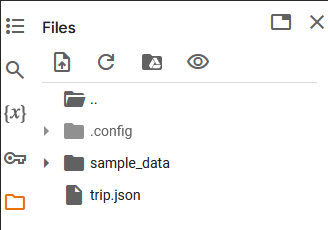
1. Run the cells below. You can do this by clicking on "Runtime > Run All" or pressing Ctrl + F9.
1. The program will create a new file with a name based on the trip name and the date of the trip (such as "France_2022-08-01.txt").
1. Hover the cursor over the file and click on the three dots, then select "download" to save the file to your local drive.
  1. If you do not download it, when you close the Colab session, the file will be erased.

Since it is a text file, you can open it in any word processor.


In [ ]:
import datetime
from dateutil import tz
import json

In [ ]:
# load the data
filename= '/content/trip.json'
with open(filename) as f_in:
    data = json.load(f_in)

In [ ]:
# process and save output

# Get the intro data
trip_name = data['name'].strip()
trip_start_date = datetime.datetime.fromtimestamp(data['start_date']).strftime('%Y-%m-%d')
trip_end_date = datetime.datetime.fromtimestamp(data['end_date']).strftime('%Y-%m-%d')
total_distance = data['total_km']
phone_type = data['travel_tracker_device']['device_name']
total_entries = data['step_count']

file_out = f"/content/{trip_name}_{trip_start_date}.txt"

with open(file_out,'w') as f_out:
  f_out.write(f"Trip Name: {trip_name}\nStart Date: {trip_start_date}\n\
End Date: {trip_end_date}\nTotal Distance: {total_distance:,.0f} (km)\n\
Recording Device: {phone_type}\n\n")

  from_zone = tz.gettz('UTC') # PS uses Unix Epoch time, which is UTC

  for entry in data['all_steps']:
    #location information
    location_name = entry['location']['name']
    location_lat = entry['location']['lat']
    location_lon = entry['location']['lon']

    # journal entry creation information
    to_zone = tz.gettz(entry['timezone_id'])
    creation_time = datetime.datetime.fromtimestamp(entry['creation_time'])
    creation_time = creation_time.replace(tzinfo = from_zone) # mark the TZ as UTC
    adjusted_time = creation_time.astimezone(to_zone)

    # weather info
    weather_condition = entry['weather_condition']
    temperature = entry['weather_temperature']

    #journal data
    journal = entry['description']

    #write out the current journal entry
    f_out.write(f"Date: {adjusted_time.strftime('%Y-%m-%d %H:%M')}\nLocation: {location_name}\
({location_lat},{location_lon})\n\
Weather: {weather_condition}, Temperature: {temperature} (c)\n\n")

    f_out.write(f"{journal}\n")
    f_out.write(f"______________________________________________________________\n\n")
